In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# get the data out from csv file
data = pd.read_csv('/Users/zihang/Desktop/Pico/MNIST/mnist_train.csv')

# test if we load it successfully
# print(data)

In [3]:
# make it to a multidimensional array, each 
data = np.array(data)

# get the Row:m and Column:n
m, n = data.shape
print(m, n)

60000 785


In [4]:
# see whats inside
# print('the first sample is:\n', data[0])

# print('\nthe first element of the first sample is:\n', data[0,0])

print(data[0:2])

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
def show_pixel_number(sample, dataset):
    # pick a sample to plot, so we know we are on the right path
    # crate a 28*28 pixels image to plot, it is initialised as a 2D array with all elements 0
    sample_array = np.zeros((28, 28))

    # pick a sample, equals to the number of row
    # sample = 4

    # then we put data into it
    for j in range(28):    
        for i in range(28):
            sample_array[j,i] = dataset[sample,j*28+i+1]

    # it is a multidimensional like this
    # image = np.array([[1, 2, 3],
    #                   [4, 5, 6],
    #                   [7, 8, 9]])
    image = sample_array

    # plot the sample
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()


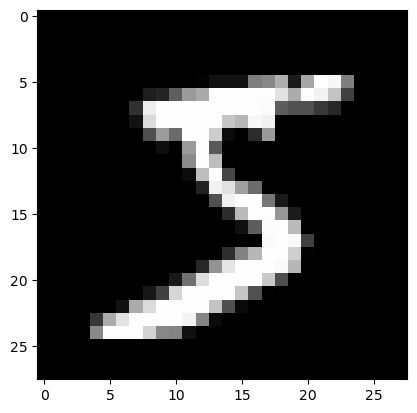

In [6]:
show_pixel_number(0, data)

In [7]:
# shuffle before splitting into dev and training sets
# np.random.shuffle(data)

# make the transposed matrix
data_dev = data[0:60000].T
# m_dev, n_dev = data_dev.shape
# print(m_dev, n_dev)
# print(data_dev)
# print(data_dev[203,0])

'''
row:    handwritten numbers, 1000
column: pixels,              784 + 1
7    2    1    0 ...
1*1
1*2
.
.
.
1*28
2*1
.
.
.

'''
# 1000 units, which are handwritten numbers
# 1*1000 matrix
handwritten = data_dev[0]
# print(handwritten)
# print(handwritten.size)
# print(handwritten.shape)

# get the pixels, 784000 units, (1000 samples * 28*28)
# 784*1000 matrix
pixels = data_dev[1:n]
# print(pixels)
# pixel_m, pixel_n = pixels.shape
# print(pixel_m, pixel_n)
# print(pixels[203])

# make their values between 0~1
pixels = pixels / 255.

In [26]:
# mathematic

'''
Forward propagation

layer 0, input layer, 784 units, call it X, 784*1 matrix, pixels are the input

'''
#
# 
'''
layer 1, hidden layer, 10 units, call it H1, 10*1 matrix

H1 = F_relu(H1_pre),  F_relu() is ReLU activation
H1_pre = w1 * X + b1
w1 has to be a 10*784 matrix, b1 has to be a 10*1 matrix

'''
#
# 
'''
layer 2, output layer, 10 units, call it Y, 10*1 matrix


Y = F_soft(Y_pre), F_soft() is Softmax activation
Y_pre = w2 * H1 + b2
w2 has to be a 10*10 matrix, b2 has to be a 10*1 matrix


'''

'\nlayer 2, output layer, 10 units, call it Y, 10*1 matrix\n\n\nY = F_soft(w2 * H1 + b2), F_soft() is Softmax activation\nY_pre = w2 * H1 + b\nw2 has to be a 10*1 matrix, b2 has to be a 10*1 matrix\n\n\n'

In [8]:
'''
Backward propagation

'''
# 
# 
'''
Aiming to get w2 & b2 correct

dY = Y - handwritten_soft 
-> handwritten_soft is a 10*1 matrix, but with 9 '0' and only 1 '1'
-> dY is 10*1 matrix, the bigger the dY, the lower the dw2 needs to be decrease

dw2 = dY * H1.T
-> H1.T is 1*10 matrix, the bigger the H1.T, the higher the dw2 be modified
-> dw2 is 10*10 matrix

db2 = dY
-> db2 is 10*1 matrix

'''
# 
# 
'''
Aiming to get w1 & b1 correct

dH1_pre = w2.T * dY * F_relu'(H1_pre)
-> like F_relu(), but F_relu'() will only have '1' or '0'
-> dH1_pre = 10*1 matrix

dw1 = dH1_pre * X.T
db1 = dH1_pre

'''

"\nAiming to get w1 & b1 correct\n\ndH1_pre = w2.T * dY * F_relu'(H1_pre)\n-> like F_relu(), but F_relu'() will only have '1' or '0'\n-> dH1_pre = 10*1 matrix\n\ndw1 = dH1_pre * X.T\ndb1 = dH1_pre\n\n"

In [9]:
# weight and bias of layer 1 and second layer 2
# make the value of weight and bias between -0.5~0.5
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

# input a number, say X, if X > 0, output = X; if X < 0, output = 0
def ReLU(x):
    return np.maximum(x, 0)

# input a number, say X, if X > 0, output = 1; if X < 0, output = 0
def ReLU_derivative(x):
    return x > 0

# input a number, say X, make the output between 0~1
def softmax(x):
    y = np.exp(x) / sum(np.exp(x))
    return y

# input a number, say X (between 0~9), make a 10*1 matrix, and only the Xth is 1, other positions are 0
def digitizer(x):
    digitizer_result = np.zeros((10, 1))
    digitizer_result[x,0] = 1
    return digitizer_result

In [31]:
def forward_prop(w1, b1, w2, b2, X):
    # layer 0 -> 1
    H1_pre = w1.dot(X) + b1
    H1 = ReLU(H1_pre)
    # layer 1 -> 2
    Y_pre = w2.dot(H1) + b2
    Y = softmax(Y_pre)
    
    return H1_pre, H1, Y_pre, Y


def backward_prop(w2, H1_pre, H1, Y, X, handwritten_number):
    # correct w2, b2
    digitizer_result = digitizer(handwritten_number)
    dY = Y - digitizer_result
    dw2 = dY.dot(H1.T)
    db2 = dY
    # correct w1, b1
    dH1_pre = w2.T.dot(dY) * ReLU_derivative(H1_pre)
    dw1 = dH1_pre.dot(X.T)
    db1 = dH1_pre
    
    return dw1, db1, dw2, db2


def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, k):
    # correct one time per propagation
    w1 = w1 - k * dw1
    b1 = b1 - k * db1    
    w2 = w2 - k * dw2  
    b2 = b2 - k * db2    
    return w1, b1, w2, b2

In [33]:
# Now let's run it!

In [32]:
# Functions for training the neural network
def get_predictions(Y):
    return np.argmax(Y, 0)


def training_oneloop(X, handwritten_number, w1, b1, w2, b2, k):
    # w1, b1, w2, b2 = init_params()
    
    H1_pre, H1, Y_pre, Y = forward_prop(w1, b1, w2, b2, X)
    dw1, db1, dw2, db2 = backward_prop(w2, H1_pre, H1, Y, X, handwritten_number)
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, k)
    
    return w1, b1, w2, b2


def gradient_descent_training(iterations, pixels, handwritten, w1, b1, w2, b2, k):
    pixels_for_one_number = np.zeros((784, 1))
    # print(pixels_for_one_number.shape)
    # print(pixels_for_one_number)
    
    for i in range(iterations):
        for j in range(784):
            pixels_for_one_number[j,0] = pixels[j,i]
        # if i % 500 == 0:
        #     print("Iteration: ", i)
        
        # print(pixels_for_one_number.shape)
        # print(pixels_for_one_number)
        w1, b1, w2, b2 = training_oneloop(pixels_for_one_number, handwritten[i], w1, b1, w2, b2, k)
        
    print('Training finished!\nThe weight and bias are stored')
    return w1, b1, w2, b2


In [12]:
# Train it now!!!

In [47]:
w1, b1, w2, b2 = init_params()
# print(w1, b1, w2, b2)

In [52]:
w1, b1, w2, b2 = gradient_descent_training(60000, pixels, handwritten, w1, b1, w2, b2, 0.005)

Training finished!
The weight and bias are stored


This is the prediction: [1]
This is the handwritten number


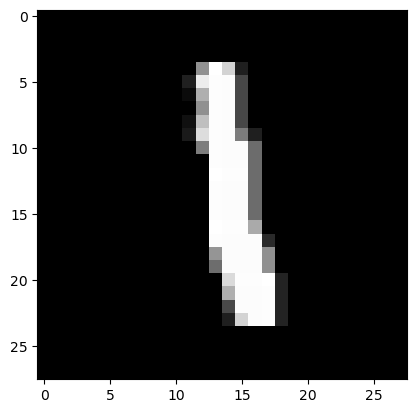

In [49]:
# pick a number from dataset
number_index = 6

pixels_for_test = np.zeros((784, 1))
for i in range(784):
    pixels_for_test[i,0] = pixels[i, number_index]
# print(pixels_for_test)    
tH1_pre, tH1, tY_pre, tY = forward_prop(w1, b1, w2, b2, pixels_for_test)
prediction = np.argmax(tY, 0)
print('This is the prediction:', prediction)
# print(tY)
print('This is the handwritten number')
show_pixel_number(number_index, data)

In [38]:
def get_accuracy(test_cycles, w1, b1, w2, b2, actual_number, pixels):
    accuracy = 0
    for re in range(test_cycles):
        number_index = re

        pixels_for_test = np.zeros((784, 1))
        for i in range(784):
            pixels_for_test[i,0] = pixels[i, number_index]

        _, _, _, raw_prediction = forward_prop(w1, b1, w2, b2, pixels_for_test)
        prediction = np.argmax(raw_prediction, 0)
        # print(prediction)
        # print(actual_number[re])
        
        if actual_number[re] == prediction :
            accuracy = accuracy+1
    accuracy = accuracy/test_cycles*100
    return accuracy

In [53]:
print('The AI accuracy is:', get_accuracy(5000, w1, b1, w2, b2, handwritten, pixels), '%')

The AI accuracy is: 91.62 %


In [40]:
# 
test_data = pd.read_csv('/Users/zihang/Desktop/Pico/MNIST/mnist_test.csv')
test_data = np.array(test_data)
# Shuffle it befire we test the accuracy

np.random.shuffle(test_data)

test_accuracy_data = test_data[0:10000].T

test_accuracy_handwritten = test_accuracy_data[0]
test_accuracy_pixels = test_accuracy_data[1:n]
test_accuracy_pixels = test_accuracy_pixels / 255.

In [54]:
print('The AI accuracy is:', get_accuracy(5000, w1, b1, w2, b2, test_accuracy_handwritten, test_accuracy_pixels), '%')

The AI accuracy is: 90.86 %
